## Electromagnetismo 1

# Tarea 3: Ecuación de Laplace - Método de Relajación

El teorema del promedio satisfecho por funciones armónicas proporciona un método computacional para resolver la ecuación de Laplace conocido como método de relajación. El objetivo de esta tarea es implementar este método.

Considere la ecuación de Laplace para el potencial $V$ en dos dimensiones con $\textbf{r} = \vec r(x,y)$ :

$$ \nabla^2 V(\textbf{r}) = 0$$

En una región rectangular $\mathcal{D}$ limitada por $0\leq x\leq a$ y $0\leq y \leq b$ con condiciones de frontera de Dirichlet $V(\textbf{r})=V_0(x,y)$ para $\textbf{r}\in\mathcal{\partial D}$ en donde $V_0$ es una función dada conocida sobre el borde del área rectangular. El dominio $\mathcal{D}$ puede ser particionado en una fina red de $N\times M$ sitios separados por $(dx,dy)$ en cada dirección.

1. Encontrar la versión discreta del laplaciano desarrollando $V$ en serie de Taylor a segundo orden en $dx$ y $dy$:

Empecemos considerando $V(\textbf{r})=V(x,y)$ para una ubicación arbitraria $x,y$ en la red del dominio $\mathcal{D}$, ahora con esto podemos aproximar el valor del potencial en una ubicación vecina, específicamente la ubicación inmediatamente a la derecha, cuya expansión en series de Taylor a segundo orden es:

$$ V(x+dx,y) = V(x,y) + dx\frac{\partial V(x,y)}{\partial x} + \frac{1}{2}dx^{2}\frac{\partial^2V(x,y)}{\partial x^2} + ... $$

Esta expresión nos es útil porque aparece una segunda derivada parcial respecto a una de las componentes, y recordando la definición del Laplaciano en coordenadas cartesianas:

$$ \nabla^2 V(\textbf{r}) = \frac{\partial^2 V(\textbf{r})}{\partial x^2}+\frac{\partial^2 V(\textbf{r})}{\partial y^2}$$

Sabemos que queremos aproximar la segunda derivada del potencial en alguna ubicación, y podemos hacerlo en términos de los valores de la función en las ubicaciones vecinas, consideremos ahora la aproximación por la izquierda:

$$ V(x-dx,y) = V(x,y) - dx\frac{\partial V(x,y)}{\partial x} + \frac{1}{2}dx^{2}\frac{\partial^2V(x,y)}{\partial x^2} + ... $$

Si sumamos estas dos expresiones:

$$ V(x+dx,y) + V(x-dx,y) = 2V(x,y)+dx^{2}\frac{\partial^2V(x,y)}{\partial x^2}$$

Con lo que la segunda derivada parcial respecto a $x$ será:

$$\frac{\partial^2V(x,y)}{\partial x^2}=\frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}}$$

Y simétricamente, la segunda derivada respecto a $y$ es:

$$\frac{\partial^2V(x,y)}{\partial y^2}=\frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}}$$

Finalmente, sumando estas dos expresiones tenemos la versión discreta del Laplaciano:

$$ \nabla^2 V(\textbf{r}) \approx \frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}} + \frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}} $$

2. Mostrar que si el Laplaciano es nulo, entonces $V(x,y)$ es igual al promedio de los valores de sus cuatro ubicaciones vecinas en la red. 

Partamos de la expresión anterior e igualemos a $0$:

$$ \nabla^2 V(\textbf{r}) = \frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}} + \frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}} = 0 $$

$$ \therefore \frac{ V(x+dx,y) + V(x-dx,y) - 2V(x,y)}{dx^{2}} = - \frac{ V(x,y+dy) + V(x,y-dy) - 2V(x,y)}{dy^{2}} $$

Simplemente debemos hallar $V(x,y)$ en esta expresión, y por simplicidad algebraica (y precisión numérica, pues truncamos la serie de Taylor a segundo orden), definiremos que los tamaños de las ubicaciones en la red son tan pequeños tal que $dx = dy = \Delta$:

$$ \frac{ V(x+\Delta,y)}{\Delta^2} + \frac{V(x-\Delta,y)}{\Delta^2} - \frac{2V(x,y)}{\Delta^{2}} = \frac{2V(x,y)}{\Delta^{2}} - \frac{V(x,y+\Delta)}{\Delta^{2}} - \frac{V(x,y-\Delta)}{\Delta^{2}} $$

$$ \frac{2V(x,y)}{\Delta^{2}} + \frac{2V(x,y)}{\Delta^{2}} = \frac{ V(x+\Delta,y)+V(x-\Delta,y)}{\Delta^2} + \frac{V(x,y+\Delta)+V(x,y-\Delta)}{\Delta^{2}}$$

$$ \frac{2V(x,y) + 2V(x,y)}{\Delta^{2}} = \frac{ V(x+\Delta,y)+V(x-\Delta,y) + V(x,y+\Delta)+V(x,y-\Delta)}{\Delta^{2}}$$

$$ 2V(x,y) + 2V(x,y) = V(x+\Delta,y)+V(x-\Delta,y) + V(x,y+\Delta)+V(x,y-\Delta)$$

$$ 4V(x,y) = V(x+\Delta,y)+V(x-\Delta,y) + V(x,y+\Delta)+V(x,y-\Delta)$$

Vemos finalmente que $V(x,y)$ es el promedio de las 4 ubicaciones vecinas en la red:

$$ V(x,y) = \frac{V(x+\Delta,y)+V(x-\Delta,y) + V(x,y+\Delta)+V(x,y-\Delta)}{4}$$

3. Implementar un programa en python para resolver la ecuación de Laplace con las condiciones de frontera dadas basado en el siguiente algoritmo:

    1. Discretizar el plano $XY$ en una red de $N\times M$ ubicaciones separadas por $dx = dy = \Delta$ en cada dirección
    2. Se asignan valores arbitrarios a $V(x,y)$ en cada sitio interno de la red.
    3. En los bordes se asignan los valores impuestos por las condiciones de frontera $V_0(x,y)$ en cada sitio interno de la red.
    4. Luego para cada sitio interno de la red se actualiza el valor de $V(x,y)$ con el promedio de los valores en los sitios vecinos (De acuerdo con la ecuación de relajación hallada en el inciso anterior).
    5.  Iterar el proceso todas las veces que sea necesario hasta que los valores del potencial $V$ no cambien sensiblemente.
    
El programa debe aceptar como entrada el número de puntos de la red $N,M$, el paso $dx = dy = \Delta$, y los valores de las condiciones de frontera $V_0(x,y)$ en los bordes. El programa devuelve la solución de la ecuación de Laplace $V(x,y)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

""" Algoritmo de relajación (No modificar estas funciones)"""

def init_grid(a:int ,b:int ,d:float):
    """ Inicializa la red discretizada de una región del
    primer cuadrante del plano XY en una red de
    a x b ubicaciones (gridpoints).

    Args:
        a: Cantidad de ubicaciones en una fila
        b: Cantidad de ubicaciones en una columna
        d: Separación de las ubicaciones
        
    Returns:
        Un array de ceros de numpy de dimensiones a x b 
        para el potencial eléctrico. 
    """
    # Podemos trabajar exclusivamente en el primer cuadrante 
    # del plano XY, por isotropía e isomorfismo espacial:
    xmin = 0.0
    ymin = 0.0
    
    # Sabemos cuantos puntos tenemos en la red, y su separación.
    # Podemos obtener con esto xmax y ymax:
    xmax = a*d
    ymax = b*d
    
    # Inicializamos la matriz para el potencial eléctrico.
    V = np.zeros((a, b))
    
    # Inicializamos matrices para coordenadas x y coordenadas y.
    x_coords = np.linspace(xmin, xmax, a)
    y_coords = np.linspace(ymin, ymax, b)
    
    return V, x_coords, y_coords

def init_boundaries(v: np.ndarray, right = 0.0, left = 0.0, up = 0.0, down = 0.0):
    """ Inicializa las condiciones de frontera para
    la red discretizada de V.

    Args:
        v: Array inicial de ceros para el potencial eléctrico
        right: Condición de frontera del borde derecho
        left: Condición de frontera del borde izquierdo
        up: Condición de frontera del borde superior
        down: Condición de frontera del borde inferior
        
    Returns:
        Un array de numpy de dimensiones a x b 
        para el potencial eléctrico con las condiciones de 
        frontera de Dirichlet implementadas.
        
    Raises:
        TypeError: v debe ser un numpy array 2D
    """
    # Verificar si v es un numpy array 2D
    if not isinstance(v, np.ndarray) or v.ndim != 2:
        raise TypeError("v debe ser un numpy array 2D")
    
    # Se extraen las dimensiones de V
    N = v.shape[0]-1 # La indexación va de 0 a N-1 en lugar de 1 a N
    M = v.shape[1]-1
    
    # Se reemplazan las condiciones de frontera
    v[:,0] = left
    v[:,N] = right
    v[0,:] = up
    v[M,:] = down
    
    return v

def relax(v: np.ndarray,tol = 1e-4):
    """ Relaja la matriz que reciba como argumento hasta completar
    10000 iteraciones o hasta que la diferencia entre iteraciones
    sea menor a 1x10^-4
    
    Args:
        v: Array 2D para el potencial con las condiciones de frontera
        tol: valor de tolerancia que se compara con la diferencia,
             entre iteraciones, si la diferencia es menor termina la
             relajación (default = 1.0e-4)
        
    Returns:
        Un array de numpy de dimensiones a x b 
        para el potencial eléctrico, con el método de relajación
        iterativamente implementado hasta alcanzar la solución.
    """
    # Necesitamos una matriz auxiliar para el método
    v_temp = v.copy()
    
    # la región a relajar no incluye las fronteras.
    N = v.shape[0]-1 # Por ende sus dimensiones son N-1, M-1.
    M = v.shape[1]-1 
    
    # Ahora si podemos iniciar las iteraciones:
    start = time.time()
    for r in range(10000):
        v = v_temp.copy()
        
        # En la operación a continuación recorremos filas, luego columnas
        # Reemplazando cada elemento de la matriz auxiliar por el promedio
        # de los elementos cercanos y luego asignamos la matriz auxiliar 
        # a la matriz real.
        for j in range(1,M):
            for i in range(1,N):
                v_temp[i,j]= 0.25*(v[i+1,j] + v[i-1,j] + v[i,j+1] + v[i,j-1])
                
        # Esto lo haremos hasta alcanzar un número máximo de iteraciones
        # o hasta que la variación por iteración sea menor a la tolerancia.}
        variacion = np.abs(v - v_temp)
        if np.max(variacion) < tol:
            print(f'Los valores de la solución han dejado de cambiar sensiblemente a partir de la iteración #{r}')
            break
    stop = time.time()
    runtime = stop-start
    print(f'El método tardó {round(runtime,4)} segundos en ser completado.')
    return v

### Para usar este programa
Si eres un usuario, por favor experimenta cambiando únicamente los valores denotados con `(ENTRADA)` en los comentarios de una línea de la siguiente celda de código. También por favor leer toda la documentación en los comentarios multi-línea antes de ejecutar.

Pasos para usar el programa:
1. Ingresar el tamaño de la red (`N,M`)
2. Ingresar el tamaño del paso (`h`)
3. Ingresar las condiciones de frontera teniendo en cuenta las recomendaciones a continuación
4. Correr el programa
    
#### Sobre las condiciones de frontera:
R: Borde derecho, L: Borde izquierdo, U: Borde superior, D: Borde inferior
Usar ints, floats, o funciones de numpy sobre arrays del tamaño de la red, por ejemplo:

1. `R = np.sin(y)`
2. `L = np.exp(y)`
3. `U = np.power(x,np.full(len(x,2.0)))`
4. `D = np.cosh(x)`

En el ejemplo 3, se asigna la función $x^2$ al borde superior. Si se van a usar funciones en lugar de valores constantes, recordar que `R` y `L` varian con la coordenada $y$ y `U` y `D` varian con la coordenada $x$.

Los valores de la solución han dejado de cambiar sensiblemente a partir de la iteración #1658
El método tardó 33.2996 segundos en ser completado.


<IPython.core.display.Javascript object>


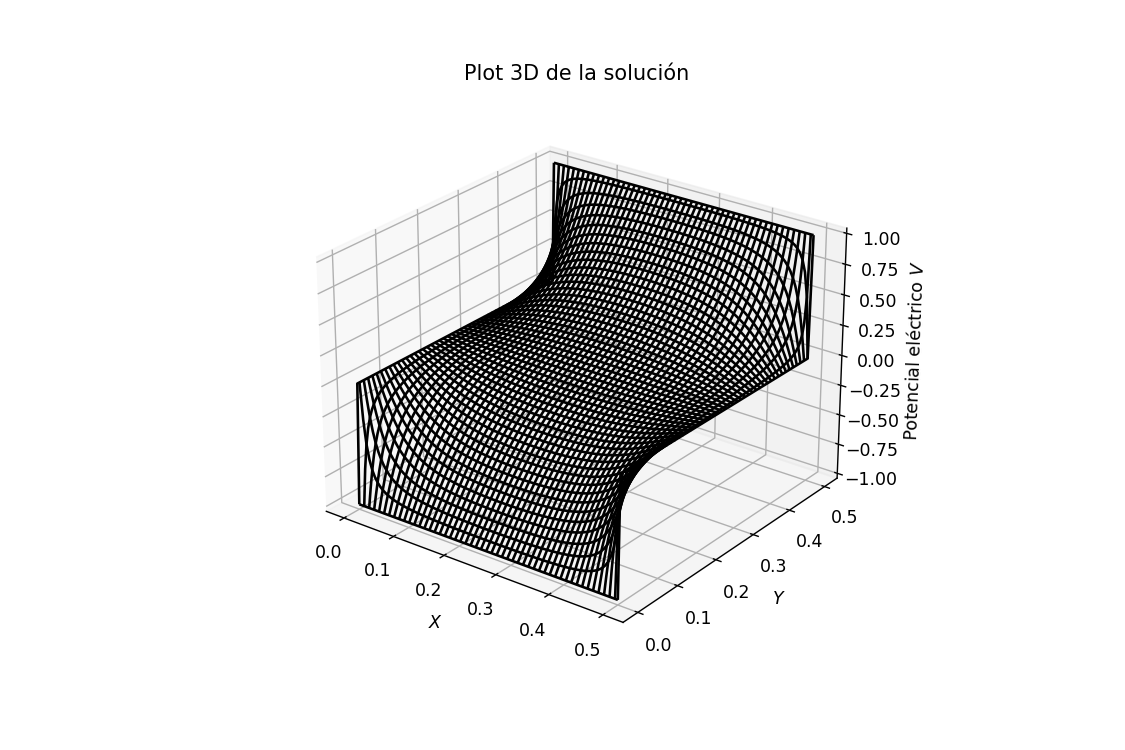

<IPython.core.display.Javascript object>


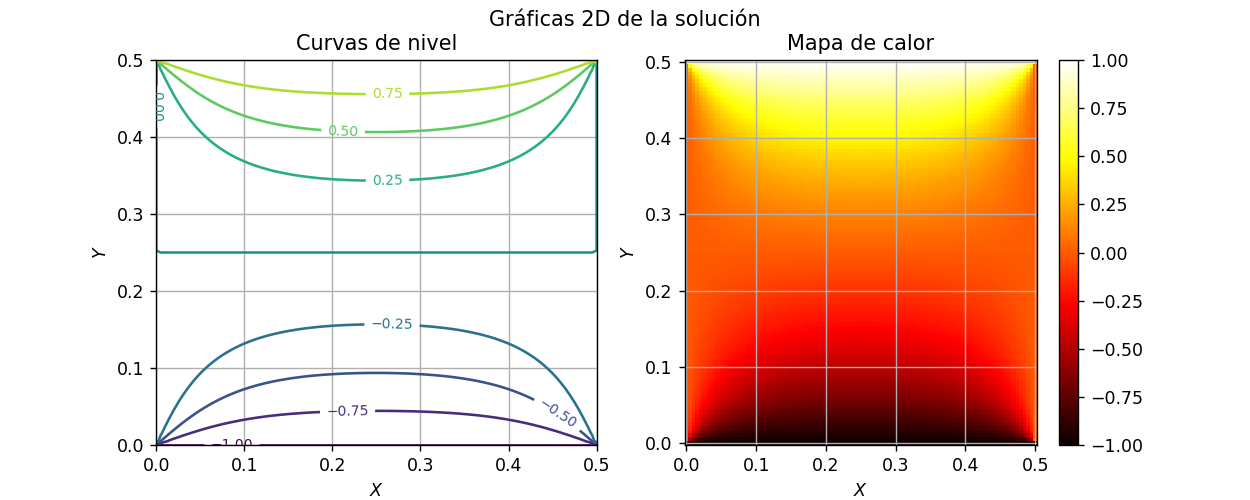

In [2]:
""" PROGRAMA """

# Número de gridpoints de la red (ENTRADA)
N = 100
M = 100

# Tamaño del paso (ENTRADA)
h = 0.005

V,x,y = init_grid(N,M,h)
X,Y = np.meshgrid(x,y)

# Condiciones de frontera (ENTRADA)
v_0 = 1
R = 0
L = 0
U = -v_0
D = v_0

V = init_boundaries(V,R,L,U,D)
V = relax(V)
    
# 3D Plot
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,V,color = 'k',label='Potencial eléctrico computado')
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'Potencial eléctrico $V$')
ax.set_title('Plot 3D de la solución')
    
# Curvas de nivel y mapa de calor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Gráficas 2D de la solución')

# Curvas de nivel
ax1.grid()
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title('Curvas de nivel')
Lvl_crvs = ax1.contour(X, Y, V)
ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline = True, fontsize = 8)

# Mapa de calor
ax2.grid()
ax2.set_xlabel(r'$X$')
ax2.set_ylabel(r'$Y$')
ax2.set_title('Mapa de calor')
heatmap = ax2.pcolormesh(X, Y, V, cmap='hot')
plt.colorbar(heatmap, ax=ax2)

plt.show()

4. Implementar el test siguiente para su programa: resolver analíticamente la ecuación de Laplace con condiciones de frontera:
$$V_0(x,y)=\begin{equation}
\left\{ 
  \begin{aligned}
    &0 \;&\text{si}\;x = 0\;\text{o}\;x=a  \\
    &-v_0 \;&\text{si}\;y = 0\\
    &v_0 \;&\text{si}\;y = b
  \end{aligned}
  \right.
\end{equation}$$Correr el programa para estas condiciones de frontera. Comparar las dos soluciones.

Ahora comparemos con la solución analítica para este problema, recordemos la ecuación de Laplace:

$$ \nabla^2 V(\textbf{r}) = \frac{\partial^2 V(\textbf{r})}{\partial x^2}+\frac{\partial^2 V(\textbf{r})}{\partial y^2}$$

Resolviendo por el método de separación de variables, proponemos el *Ansatz*:

$$ V(\textbf{r}) = f(x)g(y) $$

Y al sustituir en la ecuación y dividir toda la ecuación entre la solución obtenemos:

$$ \frac{1}{f(x)}\frac{d^2 f(x)}{dx^2}+\frac{1}{g(y)}\frac{d^2 g(y)}{d y^2} = 0$$

Por brevedad, utilizaré ahora la notación de Newton para derivadas:

$$ \frac{f''}{f} + \frac{g''}{g} = 0 \therefore \frac{f''}{f} = -\frac{g''}{g}$$

Dado que $f$ es una función sólo de $x$ y $g$ es una función sólo de $y$, la única forma en que esta igualdad se satisface es si cada lado es igual a una constante:

$$\frac{f''}{f} = -\frac{g''}{g} = C $$

Hay entonces 3 posibilidades para el valor de esta constante: $0, k^2$ o $-k^2$, su elección dependerá de las condiciones de frontera. Inspeccionemos $f$, sabemos que debe anularse en los bordes $x = 0$ y $x = a$, por lo que esta función debe tener al menos dos raíces. Si $C = 0$, $f'' = 0\therefore$ $ f' = m$ $\therefore f(x) = mx + b$, y para cualquier posible par de valores reales de $m,b$, esta función sólo tiene una única raíz. La constante entonces no puede ser $0$.

Consideremos ahora el caso $C = k^2$:

$$ f'' - k^2f = 0$$

Esta es una ecuación diferencial ordinaria, lineal de solución conocida. Al plantear un polinomio característico y proponer soluciones exponenciales, se puede escribir escribir la solución a esta ecuación con las funciones hiperbólicas:

$$ f(x) = A\sinh(kx) + B\cosh(kx) $$

Esto sin embargo no es tampoco una elección que corresponda a las fronteras de $x$, pues la función $sinh$ sólo tiene una raíz real y la función $cosh$ no tiene raices reales. Por lo cual debemos escoger entonces $C = -k^2$, con esto:

$$ f'' + k^2f = 0$$
$$ \therefore f(x) = A\sin(kx) + B\cos(kx) $$

Las funciones $sin$ y $cos$ tienen infinitas raíces reales, esto satisface las condiciones de frontera de $x$. Dado que la función $g(y)$ tiene un signo opuesto en la igualdad, a $g(y)$ le corresponderán funciones hiperbólicas, la solución completa será:

$$ V(x,y) = (A\sin(kx) + B\cos(kx))(C\sinh(ky) + D\cosh(ky)) $$

Determinaremos los valores de $A,B,C,D, k$ con las condiciones de frontera específicas del problema. Las condiciones de frontera de Dirichlet para este problema son:

$$V_0(x,y)=\begin{equation}
\left\{ 
  \begin{aligned}
    V(0,y) = 0 \\
    V(a,y) = 0 \\
    V(x,0) = -v_0 \\
    V(x,b) = v_0
  \end{aligned}
  \right.
\end{equation}$$

Usando $V(0,y) = 0$, tenemos que $B = 0$, pues queremos si $x = 0$, $f(x) = 0$, lo cual se cumple en la función $\sin$ pero no en la función $\cos$, la solución se actualiza a:

$$ V(x,y) = A\sin(kx)(C\sinh(ky) + D\cosh(ky)) $$

Usando $V(a,y) = 0$ tenemos $ A\sin(ka) = 0$, $A = 0$ sería una solución trivial, nos interesa entonces:

$$ \sin(ka) = 0 \therefore ka = n\pi \therefore k = \frac{n\pi}{a} $$

La función $\sin$ tiene raíces en todos los multiplos enteros de $\pi$, por lo que ahora la función de $f$ debe expresarse con el subíndice $f_n$ para tener en consideración las posibles soluciones asociadas a cada $n$-ésimo eigenvalor.

$$ f_n(x) = A_n\sin(\frac{n\pi}{a}x) $$

Lo mismo sucede con la función $g$, pues esta contiene la constante $k$:

$$ g_n(y) = C_n\sinh(\frac{n\pi}{a}y) + D_n\cosh(\frac{n\pi}{a}y)$$

Definimos nuestra solución como $V(x,y) = f(x)g(y)$, por lo cual al considerar la función correspondiente a a cada $n$-ésimo eigenvalor, sus combinaciones lineales por propiedades de la ecuación diferencial, son también soluciones a la ecuación:

$$ V(x,y) = \sum_{n=1}^{\infty}f_n(x)g_n(y) $$
$$ V(x,y) = \sum_{n=1}^{\infty}\left[ \left(A_n\sin\left(\frac{n\pi}{a}x\right)\right)\left(C_n\sinh\left(\frac{n\pi}{a}y\right) + D_n\cosh\left(\frac{n\pi}{a}y\right)\right) \right] $$
$$ V(x,y) = \sum_{n=1}^{\infty}\left(A_nC_n\sin\left(\frac{n\pi}{a}x\right)\sinh\left(\frac{n\pi}{a}y\right) + A_nD_n\sin\left(\frac{n\pi}{a}x\right)\cosh\left(\frac{n\pi}{a}y\right)\right) $$

El producto de dos constantes que dependen de $n$ es también otra constante que depende de $n$, entonces:

$$ V(x,y) = \sum_{n=1}^{\infty}\left(C_n'\sin\left(\frac{n\pi}{a}x\right)\sinh\left(\frac{n\pi}{a}y\right) + D_n'\sin\left(\frac{n\pi}{a}x\right)\cosh\left(\frac{n\pi}{a}y\right)\right) $$

Nos quedan dos coeficientes desconocidos, y afortunadamente también dos condiciones de frontera pendientes para determinarlos. Empecemos por $V(x,0) = -v_0$, recordando que $\sinh(0) = 0$ y $\cosh(0) = 1$:

$$ V(x,0) = \sum_{n=1}^{\infty}D_n'\sin\left(\frac{n\pi}{a}x\right) $$

Para obtener el valor de $D_n'$ en esta expresión, recordemos que $\sin$ y $\cos$ son funciones ortogonales que nos permiten expandir otras funciones utilizando series de Fourier, una función par $h(x)$ se puede expandir con senos de la siguiente manera:

$$ h(x) = \sum_{n=1}^{\infty}a_n\sin\left(\frac{n\pi}{a}x\right) \;\text{con}\;a_n = \frac{2}{a}\int_{0}^{a}h(x)\sin(\frac{n\pi}{a}x)dx$$

Y esta definición es exactamente la que aparece al reemplazar la condición de frontera $V(x,0)$, por lo cual:

$$ D_n' = \frac{2}{a}\int_{0}^{a}V(x,0)\sin\left(\frac{n\pi}{a}x\right)dx $$
$$ D_n' = \frac{-2v_0}{a}\int_{0}^{a}\sin\left(\frac{n\pi}{a}x\right)dx $$
$$ D_n' = \frac{-2v_0}{a}\frac{a\left(1-\left(-1\right)^n\right)}{n\pi} $$
$$ D_n' = \frac{-2v_0\left(1-\left(-1\right)^n\right)}{n\pi} $$

Únicamente nos resta hallar $C_n'$ empleando la condición de frontera restante: $V(x,b) = v_0$

$$ V(x,b) = \sum_{n=1}^{\infty}\left(C_n'\sinh\left(\frac{n\pi}{a}b\right) + D_n'\cosh\left(\frac{n\pi}{a}b\right)\right)\sin\left(\frac{n\pi}{a}x\right) $$

Notemos que todo el término en paréntesis es también una constante, y por el término del seno a la derecha, esto también resulta ser una expansión en senos!

$$C_n'\sinh\left(\frac{n\pi}{a}b\right) + D_n'\cosh\left(\frac{n\pi}{a}b\right)=\frac{2}{a}\int_{0}^{a}V(x,b)\sin\left(\frac{n\pi}{a}x\right)dx$$

$$C_n'\sinh\left(\frac{n\pi}{a}b\right) + D_n'\cosh\left(\frac{n\pi}{a}b\right)=\frac{2v_0\left(1-\left(-1\right)^n\right)}{n\pi}$$

$$C_n'\sinh\left(\frac{n\pi}{a}b\right) =\frac{2v_0\left(1-\left(-1\right)^n\right)}{n\pi}- D_n'\cosh\left(\frac{n\pi}{a}b\right)$$

$$C_n'\sinh\left(\frac{n\pi}{a}b\right) =\frac{2v_0\left(1-\left(-1\right)^n\right)}{n\pi} + \frac{2v_0\left(1-\left(-1\right)^n\right)}{n\pi}\cosh\left(\frac{n\pi}{a}b\right)$$

$$C_n'\sinh\left(\frac{n\pi}{a}b\right) =\frac{4v_0\left(1-\left(-1\right)^n\right)}{n\pi}\cosh\left(\frac{n\pi}{a}b\right)$$

$$C_n' =\frac{4v_0\left(1-\left(-1\right)^n\right)}{n\pi}\frac{\cosh\left(\frac{n\pi}{a}b\right)}{\sinh\left(\frac{n\pi}{a}b\right)}$$

$$C_n' =\frac{4v_0\left(1-\left(-1\right)^n\right)}{n\pi}\coth\left(\frac{n\pi}{a}b\right)$$

Finalmente la solución analítica explícita para el potencial, dadas las anteriores condiciones de frontera de Dirichlet, es:

$$ V(x,y) = \sum_{n=1}^{\infty}\left(\frac{4v_0\left(1-\left(-1\right)^n\right)}{n\pi}\coth\left(\frac{n\pi}{a}b\right)\sin\left(\frac{n\pi}{a}x\right)\sinh\left(\frac{n\pi}{a}y\right) + \frac{-2v_0\left(1-\left(-1\right)^n\right)}{n\pi}\sin\left(\frac{n\pi}{a}x\right)\cosh\left(\frac{n\pi}{a}y\right)\right) $$

$$ V(x,y) = \frac{2v_0}{\pi}\sum_{n=1}^{\infty}\left(\frac{2-2\left(-1\right)^n}{n}\coth\left(\frac{n\pi}{a}b\right)\sin\left(\frac{n\pi}{a}x\right)\sinh\left(\frac{n\pi}{a}y\right) + \frac{\left(-1\right)^n-1}{n}\sin\left(\frac{n\pi}{a}x\right)\cosh\left(\frac{n\pi}{a}y\right)\right) $$

Comparemos esta solución con la solución computacional:

<IPython.core.display.Javascript object>


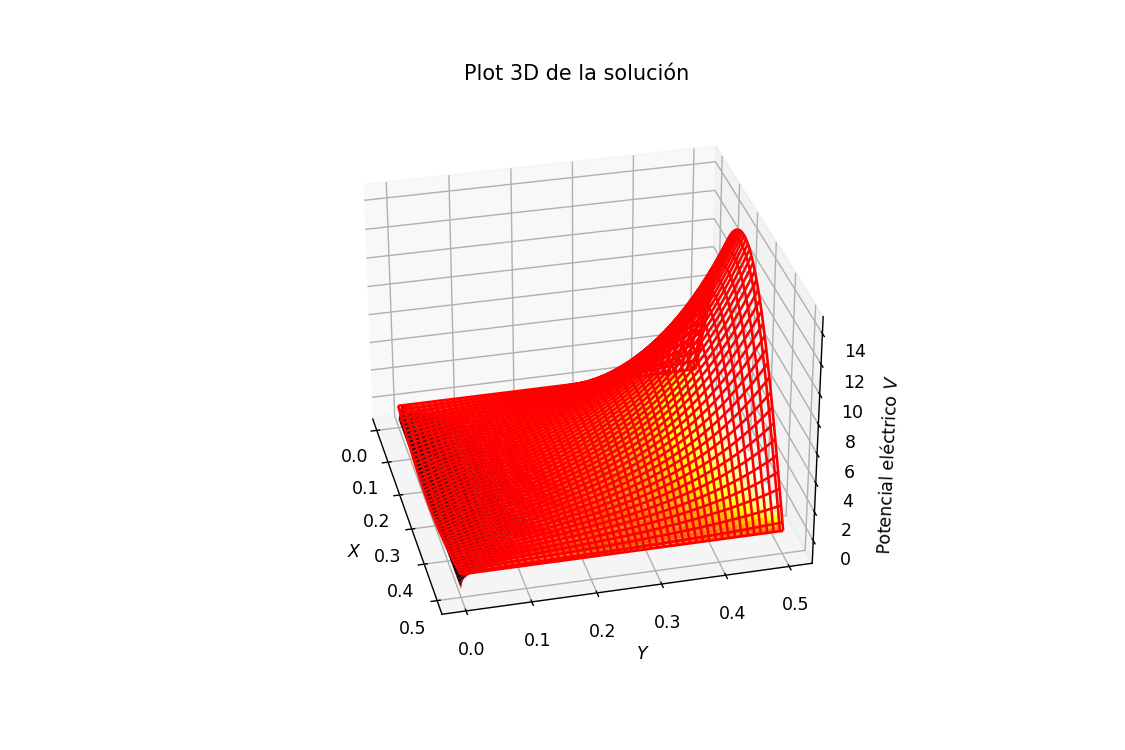

In [9]:
""" TEST """
def V_a(x,y,b,a,n):
    
    # Constantes
    k = (np.pi*n)/a
    C = (4*v_0*(1-((-1)**n)))/(n*np.pi)*(1/(np.tanh((n*np.pi*b)/(a))))
    D = (-2*v_0*(1-((-1)**n)))/(n*np.pi)
    
    return C*((np.sin(k*x)*np.sinh(k*y)))+D*((np.sin(k*x)*np.cosh(k*y)))

V_analytical = V_a(X,Y,0.5,0.5,1)

# print(V_analytical.ndim, V_analytical.shape)

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,V,label='Potencial eléctrico computado',cmap = 'hot')
ax.plot_wireframe(X,Y,V_analytical,color = 'r',label='Potencial eléctrico analítico')
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'Potencial eléctrico $V$')
ax.set_title('Plot 3D de la solución')
# ax.legend()
plt.show()

Tristemente, el cálculo analítico de la solución al potencial resultó erróneo, pues no cumple ni con las condiciones de frontera establecidas.

In [4]:
V_analytical

array([[ 0.00000000e+00, -4.03972596e-02, -8.07538426e-02, ...,
        -8.07538426e-02, -4.03972596e-02, -1.55926873e-16],
       [ 0.00000000e+00, -3.78437023e-02, -7.56492992e-02, ...,
        -7.56492992e-02, -3.78437023e-02, -1.46070556e-16],
       [ 0.00000000e+00, -3.53282568e-02, -7.06209410e-02, ...,
        -7.06209410e-02, -3.53282568e-02, -1.36361344e-16],
       ...,
       [ 0.00000000e+00,  4.39152889e-01,  8.77863589e-01, ...,
         8.77863589e-01,  4.39152889e-01,  1.69505896e-15],
       [ 0.00000000e+00,  4.53489666e-01,  9.06522707e-01, ...,
         9.06522707e-01,  4.53489666e-01,  1.75039660e-15],
       [ 0.00000000e+00,  4.68283146e-01,  9.36094770e-01, ...,
         9.36094770e-01,  4.68283146e-01,  1.80749703e-15]])

In [5]:
V

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.        , -0.49961151, -0.69687598, ..., -0.69687598,
        -0.49961151,  0.        ],
       [ 0.        , -0.30157093, -0.49844778, ..., -0.49844778,
        -0.30157093,  0.        ],
       ...,
       [ 0.        ,  0.30157093,  0.49844778, ...,  0.49844778,
         0.30157093,  0.        ],
       [ 0.        ,  0.49961151,  0.69687598, ...,  0.69687598,
         0.49961151,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])